## Gradient-free methods
### Bayesian Optimisation continued

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi

from scipy.stats import norm

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern

### Example 2: 2-D function

In [30]:
# Inputs
def g(v):
    return (v[0]**2 + v[1]**2)/4000 - np.cos(v[0]/np.sqrt(2)) * np.cos(v[1]/np.sqrt(3)) + 1

X = np.linspace(-10, 10, 2001)
Y = np.linspace(-10, 10, 2001)

Xm, Ym = np.meshgrid(X,Y)

Z = g([Xm,Ym])

xstart = np.linspace(-3.5, 0.5, 4)
ystart = np.linspace(-4.5, 1, 4)

xstartm, ystartm = np.meshgrid(xstart,ystart)
xystart = np.array([xstartm.reshape(xstartm.size,1).flatten(), ystartm.reshape(ystartm.size,1).flatten()])
zstart = g(xystart)

# create a model object
model = GaussianProcessRegressor(kernel=Matern(nu=5/2))

##### Initial phase

We pick a few starting points to feed the Bayesian Optimisation algorithm.

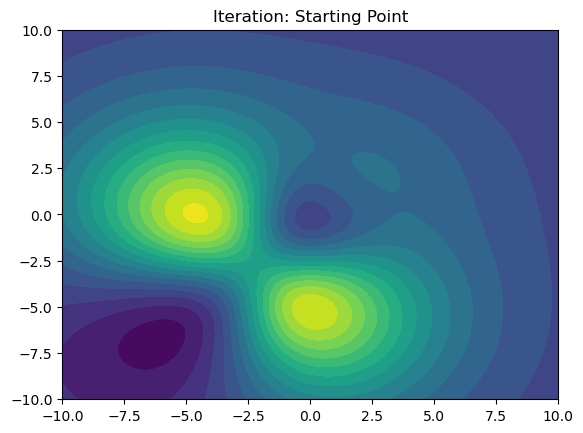

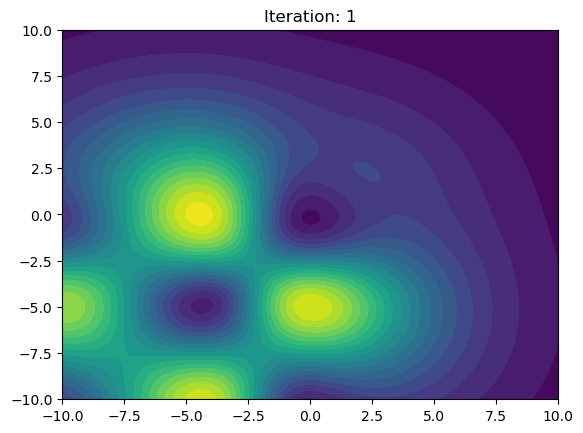

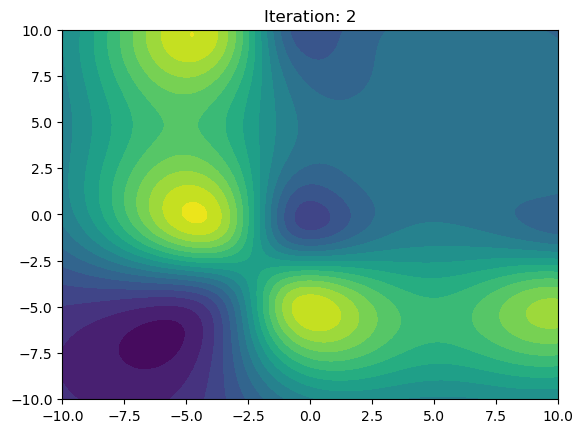

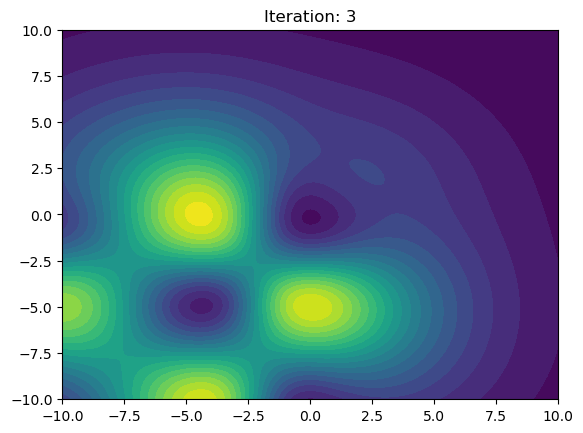

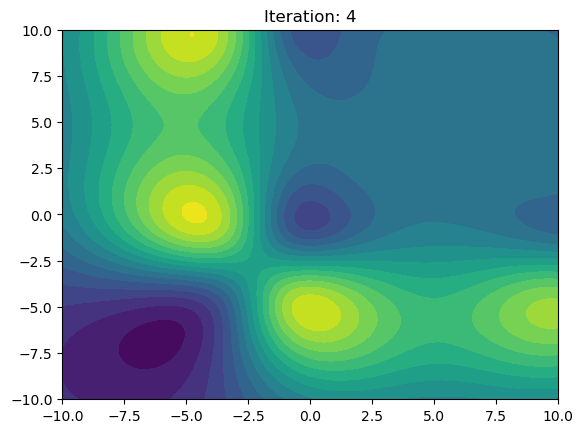

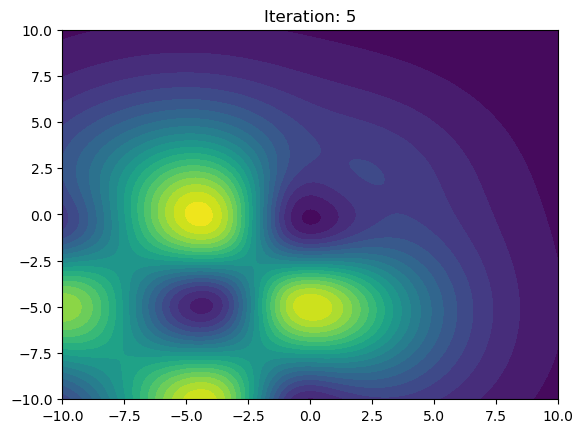

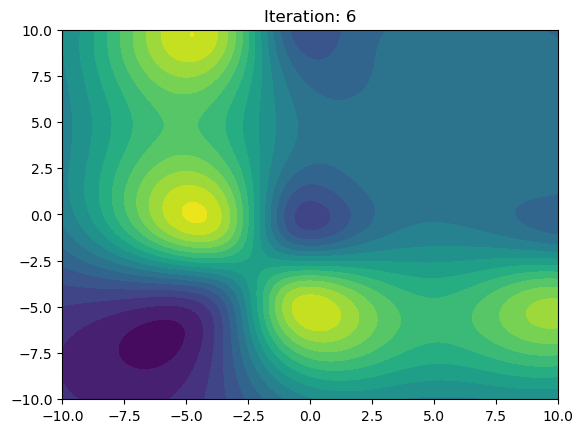

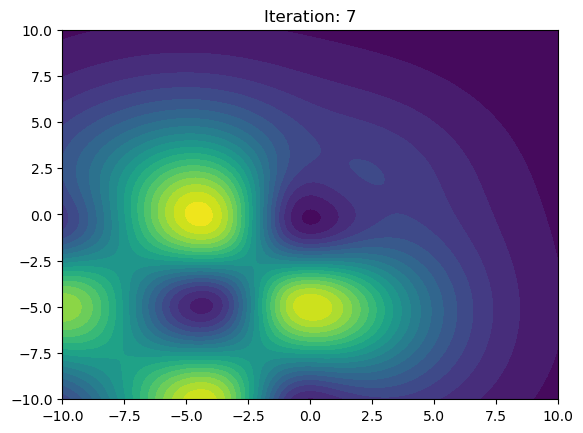

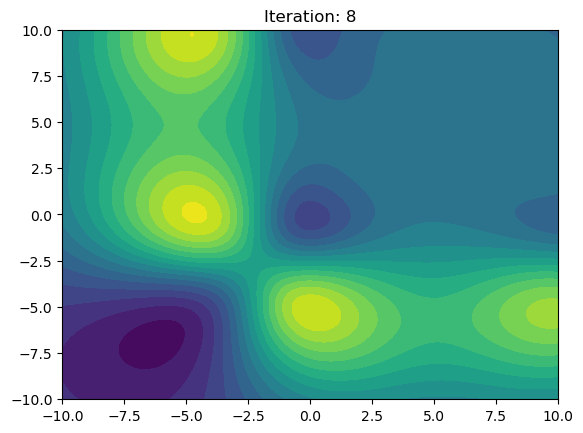

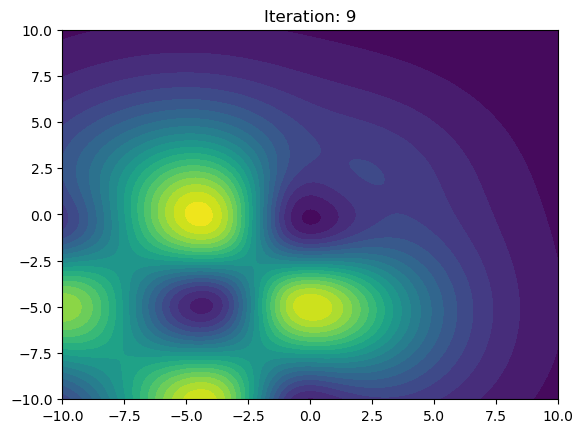

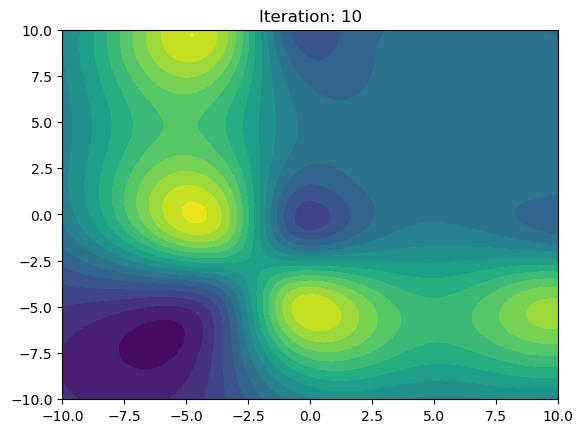

In [31]:
# fit the model to the starting points
model.fit(xystart.transpose(), zstart) #technical reshape because of sklearn's requirements

XY = np.array([Xm.reshape(Xm.size,1).flatten(), Ym.reshape(Ym.size,1).flatten()]).transpose()
XY.shape

# predict values outside of the starting sample
p1 = model.predict(XY, return_std=True) #technical reshape because of sklearn's requirements

# traditional designation for the y values of the surrogate model
mu = p1[0]

# standard deviation of the estimates in the surrogate model
sigma = p1[1]

# Starting Point 
plt.contourf(Xm, Ym, mu.reshape(2001,2001), levels = 20)
plt.title('Iteration: Starting Point')
plt.show()

# Finding new points
for i in range(0,10):
   gamma = ( np.min(zstart) - mu) / sigma

   poi = norm.cdf(gamma)
   ei = sigma * (gamma * poi + norm.pdf(gamma))

   kappa = 4 # exploration intensity
   lcb = mu - kappa * sigma

   #len(lcb)

   xynext = XY[np.argmin(lcb)]

   xynext

   g(xynext)

   xnew = np.append(xstart, xynext[0])
   ynew = np.append(ystart, xynext[1])

   xnewm, ynewm = np.meshgrid(xnew,ynew)

   xynew = np.array([xnewm.reshape(xnewm.size,1).flatten(), ynewm.reshape(ynewm.size,1).flatten()])

   znew = g(xynew)

   # fit the model to the starting points
   model.fit(xynew.transpose(), znew) #technical reshape because of sklearn's requirements

   # predict values outside of the starting sample
   p2 = model.predict(XY, return_std=True) #technical reshape because of sklearn's requirements

   # traditional designation for the y values of the surrogate model
   mu = p2[0]

   # standard deviation of the estimates in the surrogate model
   sigma = p2[1]

   plt.contourf(Xm, Ym, mu.reshape(2001,2001), levels = 20)
   plt.title(f'Iteration: {i+1}')
   plt.show() 

##### Main phase, step 1 - finding a new point where we should evaluate the function

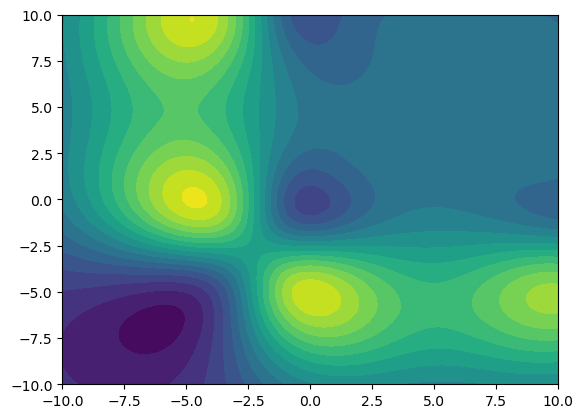

In [33]:
gamma = ( np.min(zstart) - mu) / sigma

poi = norm.cdf(gamma)
ei = sigma * (gamma * poi + norm.pdf(gamma))

kappa = 4 # exploration intensity
lcb = mu - kappa * sigma

#len(lcb)

xynext = XY[np.argmin(lcb)]

xynext

g(xynext)

xnew = np.append(xstart, xynext[0])
ynew = np.append(ystart, xynext[1])

xnewm, ynewm = np.meshgrid(xnew,ynew)

xynew = np.array([xnewm.reshape(xnewm.size,1).flatten(), ynewm.reshape(ynewm.size,1).flatten()])

znew = g(xynew)

# fit the model to the starting points
model.fit(xynew.transpose(), znew) #technical reshape because of sklearn's requirements

# predict values outside of the starting sample
p2 = model.predict(XY, return_std=True) #technical reshape because of sklearn's requirements

# traditional designation for the y values of the surrogate model
mu = p2[0]

# standard deviation of the estimates in the surrogate model
sigma = p2[1]

plt.contourf(Xm, Ym, mu.reshape(2001,2001), levels = 20)
plt.show()

Let's evaluate the function at `xnext`, add this point to our starting set `xstart` and re-estimate our surrogate function.

Let's see a package that does it:
https://github.com/fmfn/BayesianOptimization
https://thuijskens.github.io/2016/12/29/bayesian-optimisation/